In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('train.csv',index_col='ID_code')
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [56]:
trues = df.loc[df['target']==1]

In [57]:
trues.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,1.1064,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,1.2915,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,1.3999,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,5.8204,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,-1.8922,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447


In [58]:
trues.shape

(20098, 201)

In [59]:
falses = df.loc[df['target']!=1].sample(frac=1)[:len(trues)]
falses.shape

(30098, 201)

In [60]:
data = pd.concat([trues,falses],ignore_index=True).sample(frac=1)
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
28063,0,16.2100,-1.1591,9.8475,5.4568,10.5885,12.5959,4.6520,18.4244,5.6594,...,-0.8928,8.9986,3.6543,1.0822,12.3317,2.6390,-0.8997,8.4770,11.4696,10.9086
15752,1,11.7628,2.9434,5.9360,10.2492,11.0712,-13.6888,6.0611,17.0353,-4.7374,...,3.3171,5.6577,4.6040,1.1925,14.9103,-2.1016,2.4510,6.8869,18.1885,12.5141
42436,0,11.4008,-2.4678,5.7204,4.1561,11.8637,0.4652,5.5057,15.4692,0.4109,...,-3.4289,8.5912,4.0151,8.0419,11.7349,0.5996,5.6444,7.9355,18.1704,-8.3223
48025,0,7.8155,-2.8938,7.2717,4.9310,15.0865,-5.5848,5.2932,14.6323,-3.3468,...,5.6441,4.7796,2.2447,2.8682,19.1300,0.8387,0.1063,7.8829,11.2300,-17.9050
43473,0,6.7551,2.4960,12.4511,4.8902,12.0333,-10.4691,6.3656,16.2970,0.9727,...,-0.8648,6.1152,2.3418,4.8939,15.2834,-1.8494,6.0491,6.9834,7.9062,-3.9304


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = data['target']
X = data.drop('target',axis=1)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_valid, Y_train, Y_valid = train_test_split(X,y,test_size=0.2)

In [62]:
X_train.shape,X_valid.shape

((40156, 200), (10040, 200))

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = []
models.append(('XGBoost',XGBClassifier(n_estimators=1000,learning_rate=0.4,n_jobs=-1)))
models.append(('LightGBM',LGBMClassifier(learning_rate=0.312,n_estimators=1050,n_jobs=-1)))
#models.append(('LDA',LinearDiscriminantAnalysis()))
#models.append(('QDA',QuadraticDiscriminantAnalysis()))
#models.append(('AdaBoostClassifier',AdaBoostClassifier()))
#models.append(('Bagging',BaggingClassifier()))
#models.append(('Extra Trees Ensemble', ExtraTreesClassifier(n_estimators=100)))
#models.append(('Gradient Boosting',GradientBoostingClassifier()))
#models.append(('Random Forest', RandomForestClassifier(n_estimators=1000)))
#models.append(('Ridge',RidgeClassifier()))
#models.append(('SGD',SGDClassifier(tol=1e-3,max_iter=1000)))
#models.append(('BNB',BernoulliNB()))
models.append(('GNB',GaussianNB()))
#models.append(('KNN',KNeighborsClassifier()))
#models.append(('MLP',MLPClassifier()))
#models.append(('LSVC',LinearSVC(max_iter=10000)))
#models.append(('NuSVC',NuSVC(gamma='scale')))
#models.append(('SVC',SVC(gamma='scale')))
#models.append(('DTC',DecisionTreeClassifier()))
#models.append(('ETC',ExtraTreeClassifier()))

DECISION_FUNCTIONS = {"Ridge","SGD","LSVC","NuSVC","SVC"}

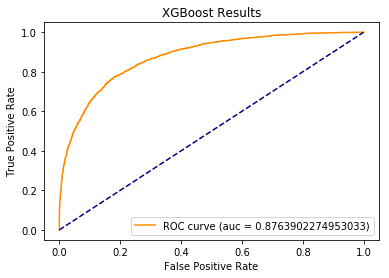

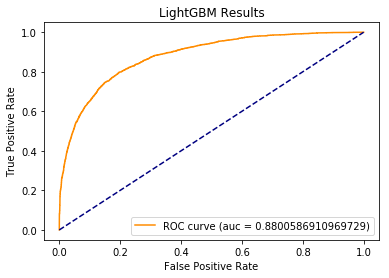

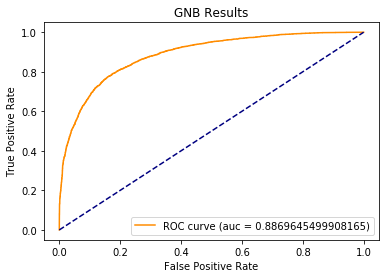

Best model is GNB


In [66]:
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

best_model = None
best_model_name = ""
best_valid = 0

for name, model in models:
    model.fit(X_train,Y_train)
    if name in DECISION_FUNCTIONS:
        proba = model.decision_function(X_valid)
    else:
        proba = model.predict_proba(X_valid)[:,1]
    score = roc_auc_score(Y_valid, proba)
    fpr, tpr, _  = roc_curve(Y_valid, proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title(f"{name} Results")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    if score > best_valid:
        best_valid = score
        best_model = model
        best_model_name = name

print(f"Best model is {best_model_name}")
    

In [47]:
test = pd.read_csv("test.csv", index_col='ID_code')
submission = pd.read_csv("sample_submission.csv", index_col='ID_code')

test_X = scaler.transform(test)
if best_model_name in DECISION_FUNCTIONS:
    submission['target'] = best_model.decision_function(test_X)
else:
    submission['target'] = best_model.predict_proba(test_X)[:, 1]
submission.to_csv(f"{best_model_name}_submission.csv")